# Luminaire Simulator

Simulate the path from light fixtures to the camera.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.BackgroundSimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.LuminaireSimulator(results, waves =  80, bundles =  5000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/80 [00:00<?, ?it/s]

# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 20:37:43  Samples:  4670
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.921    CPU time: 25.975
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-93d17ca2-7bdd-4051-a89f-ddb673d1e61d.json

25.921 run_code  IPython/core/interactiveshell.py:3400
└─ 25.921 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 25.921 run_all_waves  simulation.py:25
      └─ 25.813 run  simulation.py:42
         ├─ 25.481 record_results  simulation.py:31
         │  ├─ 18.977 histogram  stats_cuda.py:45
         │  │  ├─ 8.197 counter  stats_cuda.py:224
         │  │  │  └─ 8.137 histogramdd  cupy/_statistics/histogram.py:285
         │  │  │     ├─ 5.954 [self]  
         │  │  │     └─ 2.175 bincount  cupy/_statistics/histogram.py:513
         │  │  │        └─ 2.174 [self]  
         │  │  ├─ 8.038 histogram_4d  stats_cuda.py:283
         │  │  │  

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))

399999935.0


# <center> Source

photon bundle count: 400000000
photon total energy (J): 0.00004
photon total power (W): 0.04295


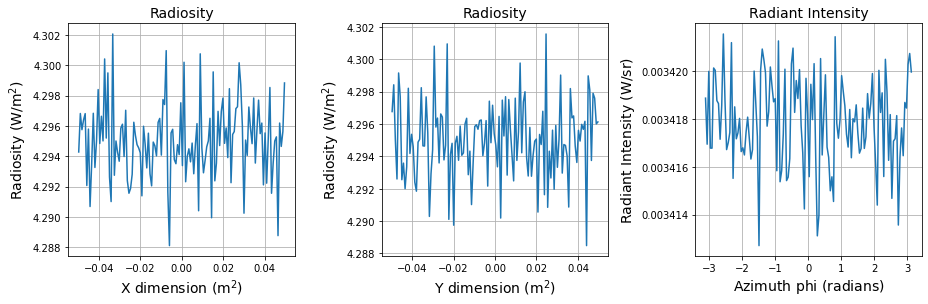

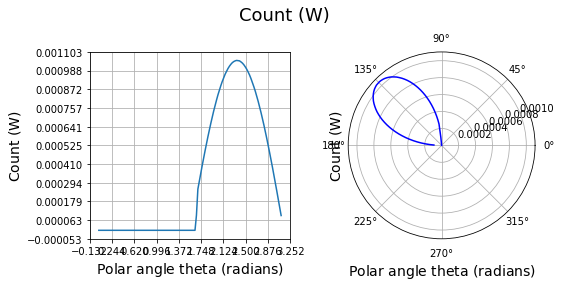

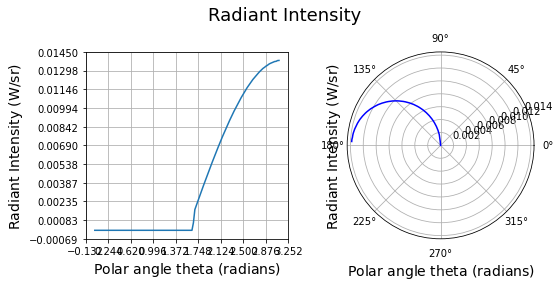

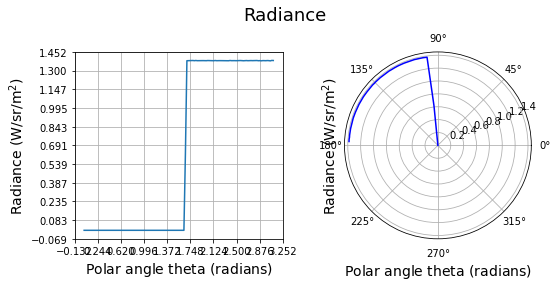

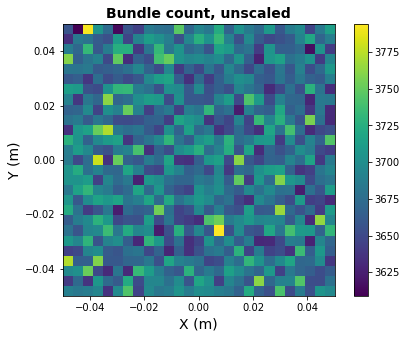

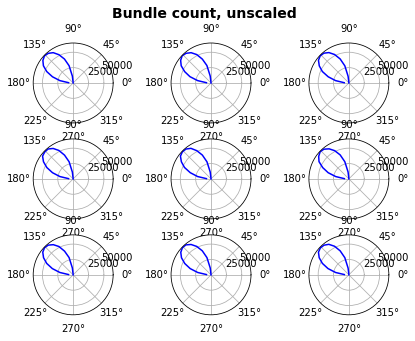

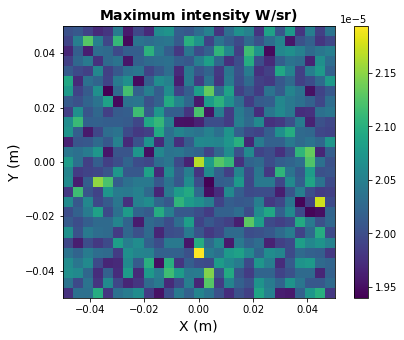

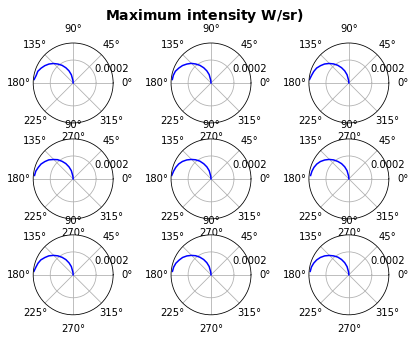

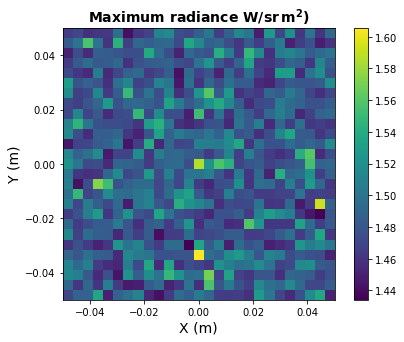

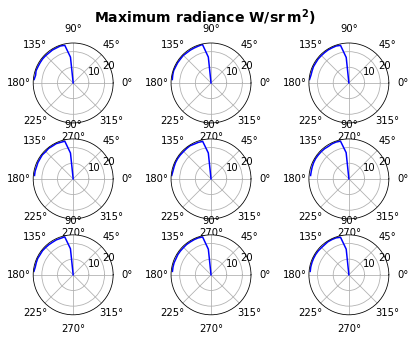

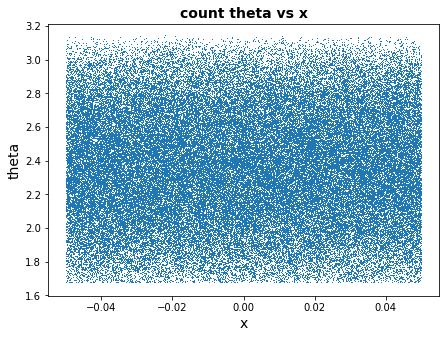

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Camera Plane

photon bundle count: 51616
photon total energy (J): 0.00000
photon total power (W): 0.00001


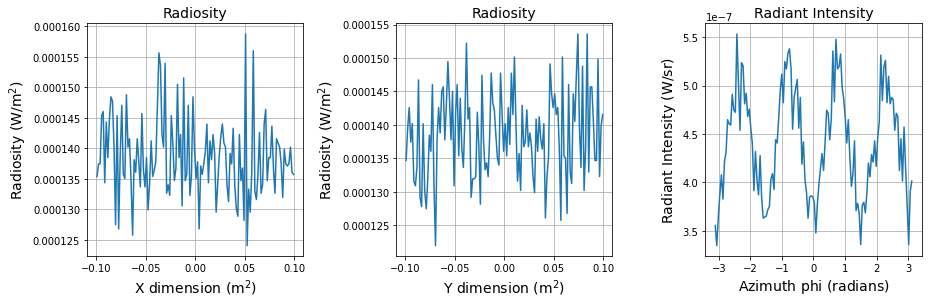

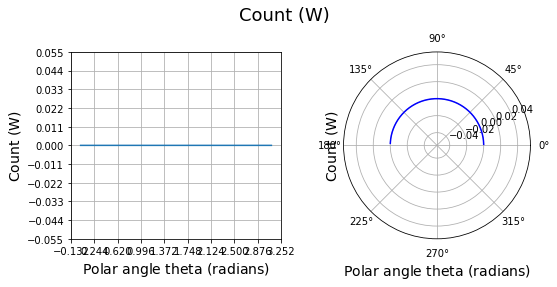

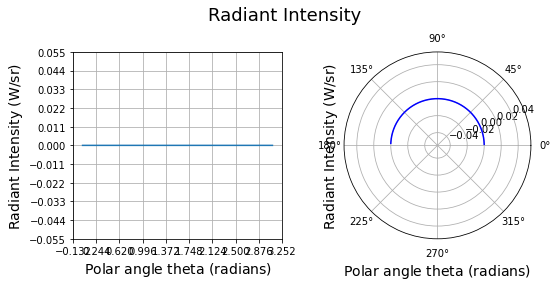

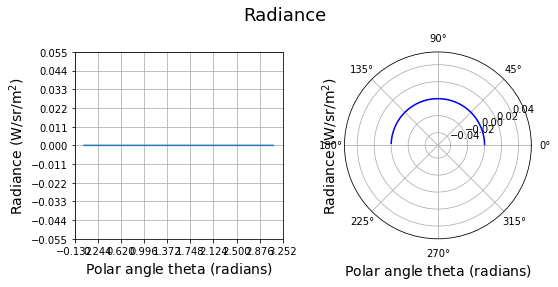

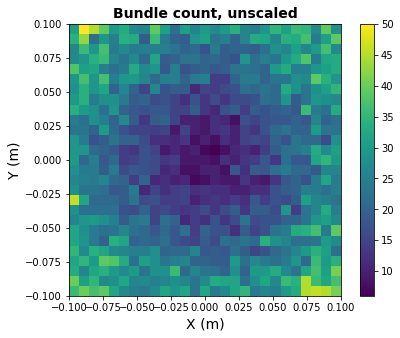

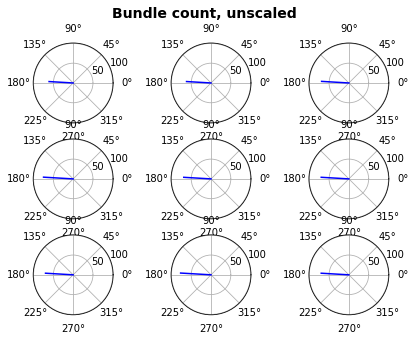

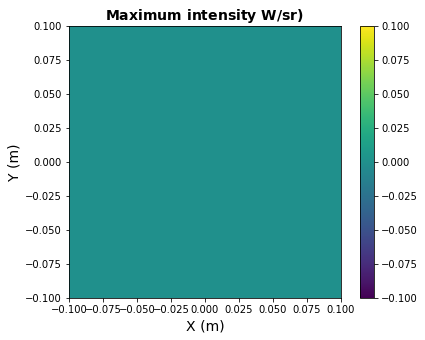

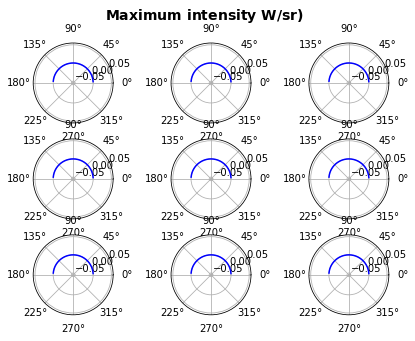

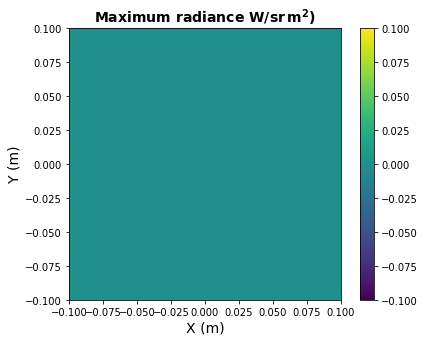

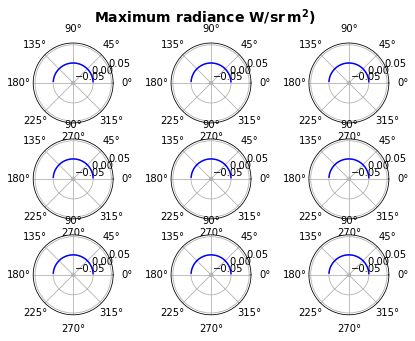

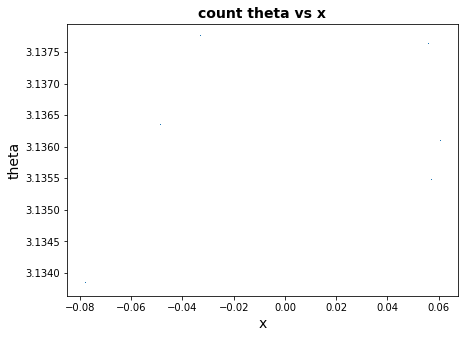

Output()

In [5]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [6]:
viz_cuda.plot_stages_3d([results._source_stage, results._camera_plane_stage])

Output()

In [7]:
print(f"camera total {simulator._camera._total_photons}")

camera total 38700000.0
